In [5]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from utils import plot_loss_curves

In [6]:
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_datagen_aug = ImageDataGenerator(rescale=1./255, 
                                       rotation_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.3,
                                       horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [8]:
IMG_SIZE=(224,224)

print('Augmented training data')
train_data_aug = train_datagen_aug.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=32, class_mode="binary",
    shuffle=True 
) #demo

print('Non Augmented test data')
test_data = test_datagen.flow_from_directory(test_dir, target_size=IMG_SIZE, batch_size=32, class_mode="binary")


Augmented training data
Found 1500 images belonging to 2 classes.
Non Augmented test data
Found 500 images belonging to 2 classes.


In [12]:
# import warnings
# warnings.filterwarnings("ignore", message="Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor.")


model_7 = Sequential([
    Conv2D(10,3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

history_7 = model_7.fit(train_data_aug, 
                        validation_data=test_data,
                        epochs=5, 
                        steps_per_epoch=len(train_data_aug), 
                        validation_steps=len(test_data))

C:\code\tesnorflow-udemy\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 583ms/step - accuracy: 0.5200 - loss: 0.6972 - val_accuracy: 0.5860 - val_loss: 0.6580
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 495ms/step - accuracy: 0.6206 - loss: 0.6520 - val_accuracy: 0.8060 - val_loss: 0.4663
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 373ms/step - accuracy: 0.7175 - loss: 0.5558 - val_accuracy: 0.8120 - val_loss: 0.4138
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 386ms/step - accuracy: 0.7527 - loss: 0.5118 - val_accuracy: 0.8340 - val_loss: 0.3848
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 447ms/step - accuracy: 0.7611 - loss: 0.4876 - val_accuracy: 0.8560 - val_loss: 0.3536


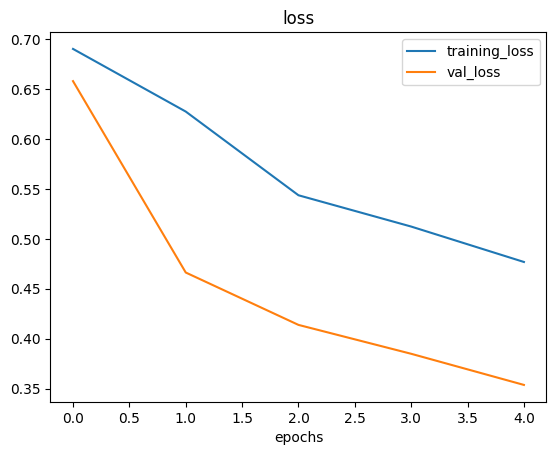

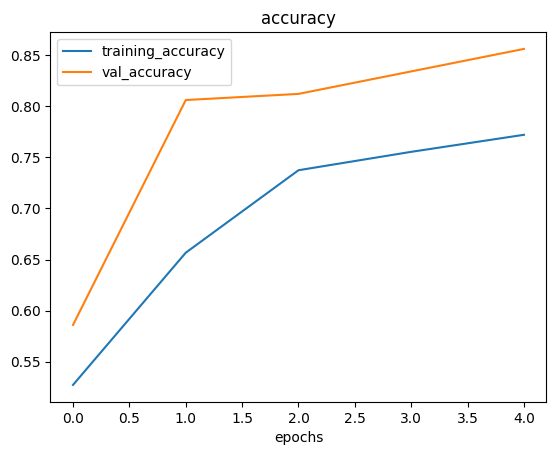

In [14]:
from utils import plot_loss_curves

plot_loss_curves(history_7)